In [6]:
!python -V

Python 3.9.12


In [11]:
import pandas as pd

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
pd.__version__

'1.4.2'

In [9]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [15]:
!pip install pyarrow

In [16]:
# We call also ditrectly read the URL is we not downloadig locally. 
# https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet
# Read Jan, 2023 data
df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [17]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [18]:
df.info

<bound method DataFrame.info of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1               2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2               2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3               1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4               2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
...           ...                  ...                   ...              ...   
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN

In [19]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [20]:
df.shape
# There are total of 3066766 rows and 19 columns in Jan 2023 Yellow Taxi Data Set.

(3066766, 19)

In [21]:
# Get the duration of the trip and convert to minutes
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [22]:
df['duration'].std()

42.594351241920904

In [23]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [24]:
df[df['duration'] <= 0.0]["duration"].value_counts(bins=10)

(-2.92, 0.0]        1118
(-29.23, -26.28]       1
(-20.44, -17.52]       1
(-14.6, -11.68]        1
(-26.28, -23.36]       0
(-23.36, -20.44]       0
(-17.52, -14.6]        0
(-11.68, -8.76]        0
(-8.76, -5.84]         0
(-5.84, -2.92]         0
Name: duration, dtype: int64

In [25]:
df['duration'].describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [26]:
# Consider only trips between 1 and 60 minutes (remove the outliers)
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [27]:
df.shape

(3009173, 20)

In [28]:
# Calculate the percentage of total records remaining after removing outliers
round((3009173 / 3066766) * 100)

98

In [29]:
# Create the categorical and numerical features
# The IDs are stored as numbers
categorical = ['PULocationID', 'DOLocationID'] # The PU and DO locations are of type int64
#numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str) # Dictvectorisers use one hot encoding for features that are of type "string"

/tmp/ipykernel_2772/2281784152.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str) # Dictvectorisers use one hot encoding for features that are of type "string"


In [30]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [31]:
# Create a dictionary of records that can be later processed using DictVectoriser (Only categorical)
train_dicts = df[categorical].to_dict(orient='records')

In [32]:
train_dicts

[{'PULocationID': '161', 'DOLocationID': '141'},
 {'PULocationID': '43', 'DOLocationID': '237'},
 {'PULocationID': '48', 'DOLocationID': '238'},
 {'PULocationID': '138', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '79'},
 {'PULocationID': '161', 'DOLocationID': '137'},
 {'PULocationID': '239', 'DOLocationID': '143'},
 {'PULocationID': '142', 'DOLocationID': '200'},
 {'PULocationID': '164', 'DOLocationID': '236'},
 {'PULocationID': '141', 'DOLocationID': '107'},
 {'PULocationID': '234', 'DOLocationID': '68'},
 {'PULocationID': '79', 'DOLocationID': '264'},
 {'PULocationID': '164', 'DOLocationID': '143'},
 {'PULocationID': '138', 'DOLocationID': '33'},
 {'PULocationID': '33', 'DOLocationID': '61'},
 {'PULocationID': '79', 'DOLocationID': '186'},
 {'PULocationID': '90', 'DOLocationID': '48'},
 {'PULocationID': '113', 'DOLocationID': '255'},
 {'PULocationID': '237', 'DOLocationID': '239'},
 {'PULocationID': '143', 'DOLocationID': '229'},
 {'PULocationID': '137', 'DOLocat

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

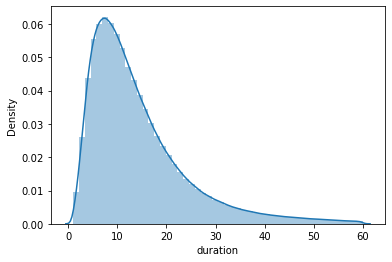

In [33]:
sns.distplot(df['duration'])

In [34]:
df['duration'].describe(percentiles=[.99, .98, .95])

count    3.009173e+06
mean     1.420486e+01
std      9.939386e+00
min      1.000000e+00
50%      1.155000e+01
95%      3.476667e+01
98%      4.450000e+01
99%      5.026667e+01
max      6.000000e+01
Name: duration, dtype: float64

In [35]:

# The purpose of a DictVectorizer is to create a new feature for each one hot encoded categorical value.
# No pre-processing will be done on numerical features
dv = DictVectorizer()

X_train = dv.fit_transform(train_dicts)

In [36]:
X_train # features matrix

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [37]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

In [61]:
len(df['PULocationID'].unique())

255

In [62]:
len(df['DOLocationID'].unique())

260

In [ ]:
# Using DictVectorizer creates a sparse matrix instead of a dense matrix. Only those features that are non-zero are stored
# Theer are a total of 255 + 260 = 515 features for PU and DO location ID so that many features are created by
# Dictvectorizer

In [64]:
# Understand sparse matrix of features of training dataset
first_row = X_train[0,:]
first_row

<1x515 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [65]:
first_row.shape

(1, 515)

In [69]:
# Convert the first row of the training dataset into a dense format for easier analysis
first_row = X_train[0,:].toarray()

In [50]:
first_row[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [54]:
first_row[0][40:45]

array([0., 0., 0., 1., 0.])

In [46]:
len(first_row)

1

In [51]:
# Identify the indices of non-zero elements in the first row to see which features are included
import numpy as np
nonzero_indices = np.nonzero(first_row)[1]
nonzero_indices

array([ 43, 325])

In [67]:
# Retrieve the list of all feature names after the DictVectorizer transformation
feature_names = dv.get_feature_names_out()
feature_names

array(['DOLocationID=1', 'DOLocationID=10', 'DOLocationID=100',
       'DOLocationID=101', 'DOLocationID=102', 'DOLocationID=106',
       'DOLocationID=107', 'DOLocationID=108', 'DOLocationID=109',
       'DOLocationID=11', 'DOLocationID=111', 'DOLocationID=112',
       'DOLocationID=113', 'DOLocationID=114', 'DOLocationID=115',
       'DOLocationID=116', 'DOLocationID=117', 'DOLocationID=118',
       'DOLocationID=119', 'DOLocationID=12', 'DOLocationID=120',
       'DOLocationID=121', 'DOLocationID=122', 'DOLocationID=123',
       'DOLocationID=124', 'DOLocationID=125', 'DOLocationID=126',
       'DOLocationID=127', 'DOLocationID=128', 'DOLocationID=129',
       'DOLocationID=13', 'DOLocationID=130', 'DOLocationID=131',
       'DOLocationID=132', 'DOLocationID=133', 'DOLocationID=134',
       'DOLocationID=135', 'DOLocationID=136', 'DOLocationID=137',
       'DOLocationID=138', 'DOLocationID=139', 'DOLocationID=14',
       'DOLocationID=140', 'DOLocationID=141', 'DOLocationID=142',
  

In [68]:
len(feature_names)

515

In [72]:
# Display specific features corresponding to the non-zero indices of the first row
features_names[[ 43, 325]]

array(['DOLocationID=141', 'PULocationID=161'], dtype=object)

In [73]:
dv

DictVectorizer()

In [5]:
len(df)

NameError: name 'df' is not defined

In [ ]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [16]:
# Function to create train and validation datasets and run different models on it

def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [17]:
# Jan, 2021 trips for training and Feb, 2021 for validation   
#df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
#df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')
df_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [19]:
len(df_train), len(df_val)

(3009173, 2855951)

In [21]:
categorical = ['PULocationID', 'DOLocationID']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [22]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [23]:
# RMSE on training dataset
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

7.6492610279057605

In [25]:
# RMSE on validation dataset by running the validation on the model fit to training dataset
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.81183265470218